In [ ]:
!pip install langdetect
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=338fd139a318da0388a72174050eb8f77a3606aad3dd75ac9bc06d649f673e32
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
import numpy as np
from langdetect import detect
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer,PatternAnalyzer

In [ ]:
!wget https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/listings.csv.gz
!gzip -d listings.csv.gz

--2024-05-24 12:40:19--  https://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2024-03-30/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 99.84.108.97, 99.84.108.41, 99.84.108.126, ...
Connecting to data.insideairbnb.com (data.insideairbnb.com)|99.84.108.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302810 (2.2M) [application/x-gzip]
Saving to: ‘listings.csv.gz’

listings.csv.gz     100%[===================>]   2.20M  --.-KB/s    in 0.09s   

2024-05-24 12:40:20 (25.5 MB/s) - ‘listings.csv.gz’ saved [2302810/2302810]



In [ ]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("listings.csv")
df_l = df[(df['amenities'].notna()) & (df['review_scores_rating'].notna())]
df_l['amenities'].head()

0    ["Heating", "Elevator", "Essentials", "Kitchen...
1    ["Iron", "Long term stays allowed", "Hair drye...
2    ["Dryer", "Beach access", "Hair dryer", "Heati...
3    ["Stove", "Oven", "Heating", "Shared backyard ...
4    ["Iron", "Dryer", "Long term stays allowed", "...
Name: amenities, dtype: object

In [ ]:
from typing import ItemsView
import ast
from collections import Counter
unique_amenities = Counter()
amenity_list = []

for amenity in df_l['amenities']:
    # Convert the string representation of the list to an actual list
    item = ast.literal_eval(amenity)
    unique_amenities.update(item)

amenities_count = dict(unique_amenities)
print(f'The number of unique amenities is:' + str(len(amenities_count)))

# Clean the keys Characters to strip from the beginning of each key
strip_chars = ' -.'
cleaned_amenities_count = {key.lstrip(strip_chars): value for key, value in amenities_count.items()}

# Sort the dictionary by key
sorted_amenities_count = dict(sorted(cleaned_amenities_count.items()))
print(f'The number of unique amenities is:' + str(len(sorted_amenities_count)))
set(amenities_count) - set(cleaned_amenities_count)

sorted_dict_desc = dict(sorted(cleaned_amenities_count.items(), key=lambda item: item[1], reverse=True))
print(len(sorted_dict_desc))

my_count = {'TV':0, 'HDTV':0}
for k, v in amenities_count.items():
  ck = k.lstrip(strip_chars).split(" – ")[0]
  if 'HDTV' in ck:
    my_count['HDTV'] +=1
  elif 'TV' in ck:
    my_count['TV'] +=1
  elif ck in my_count:
    my_count[ck] += v
  else:
    my_count[ck] = v

sorted_dict_desc = dict(sorted(my_count.items(), key=lambda item: item[1], reverse=True))
print(len(sorted_dict_desc))
sorted_dict_desc

The number of unique amenities is:1643
The number of unique amenities is:1643
1643
964


{'Kitchen': 3445,
 'Smoke alarm': 3226,
 'Wifi': 3173,
 'Essentials': 2930,
 'Dishes and silverware': 2829,
 'Hot water': 2736,
 'Refrigerator': 2575,
 'Hangers': 2512,
 'Cooking basics': 2446,
 'Hair dryer': 2386,
 'Bed linens': 2384,
 'Iron': 2329,
 'Heating': 2030,
 'Microwave': 1927,
 'Fire extinguisher': 1903,
 'Dishwasher': 1799,
 'Dedicated workspace': 1720,
 'Shampoo': 1710,
 'Dining table': 1688,
 'Freezer': 1637,
 'Washer': 1621,
 'Oven': 1620,
 'Wine glasses': 1604,
 'Cleaning products': 1533,
 'Extra pillows and blankets': 1506,
 'Room-darkening shades': 1464,
 'Coffee maker': 1359,
 'Stove': 1329,
 'Hot water kettle': 1290,
 'Toaster': 1287,
 'Self check-in': 1246,
 'Elevator': 1232,
 'Body soap': 1145,
 'Outdoor dining area': 1145,
 'First aid kit': 1138,
 'Private entrance': 1096,
 'Long term stays allowed': 1084,
 'Shower gel': 1076,
 'Outdoor furniture': 1000,
 'Drying rack for clothing': 972,
 'Private patio or balcony': 962,
 'Bathtub': 940,
 'Coffee': 906,
 'Dryer':

In [ ]:
df_l[['amenities']].head()

,amenities
0,"[""Heating"", ""Elevator"", ""Essentials"", ""Kitchen..."
1,"[""Iron"", ""Long term stays allowed"", ""Hair drye..."
2,"[""Dryer"", ""Beach access"", ""Hair dryer"", ""Heati..."
3,"[""Stove"", ""Oven"", ""Heating"", ""Shared backyard ..."
4,"[""Iron"", ""Dryer"", ""Long term stays allowed"", ""..."


In [ ]:
my_count

{'TV': 91,
 'HDTV': 318,
 'Heating': 2030,
 'Elevator': 1232,
 'Essentials': 2930,
 'Kitchen': 3445,
 'Gym': 56,
 'Wifi': 3173,
 'Iron': 2329,
 'Long term stays allowed': 1084,
 'Hair dryer': 2386,
 'Smoke alarm': 3226,
 'Courtyard view': 387,
 'Lock on bedroom door': 223,
 'Shared backyard': 431,
 'Dishes and silverware': 2829,
 'Microwave': 1927,
 'Shampoo': 1710,
 'Garden view': 401,
 'Coffee maker': 1359,
 'Luggage dropoff allowed': 770,
 'Fast wifi': 342,
 'Host greets you': 818,
 'Hot water': 2736,
 'Outdoor playground': 293,
 'Bed linens': 2384,
 'Free dryer': 787,
 'Free washer': 785,
 'Extra pillows and blankets': 1506,
 'Refrigerator': 2575,
 'Park view': 171,
 'Hangers': 2512,
 'Bathtub': 940,
 'Dryer': 886,
 'Beach access': 207,
 'Body soap': 1145,
 'Cooking basics': 2446,
 'Private patio or balcony': 962,
 'Self check-in': 1246,
 'Keypad': 302,
 'Stove': 1329,
 'Oven': 1620,
 'City skyline view': 223,
 'Dedicated workspace': 1720,
 'BBQ grill': 828,
 'Hot tub': 40,
 'Apple

In [ ]:
# Create a DataFrame with zeros for each key in my_count
binary_table = pd.DataFrame(0, index=df_l.index, columns=my_count.keys())

for index, row in df_l.iterrows():
    amenities_list = ast.literal_eval(row['amenities'])
    for item in amenities_list:
       if item in binary_table.columns:
          binary_table.at[index, item] = 1

# # Concatenate the original DataFrame with the binary table
# df_final = pd.concat([df_l['amenities'], binary_table], axis=1)

binary_table


,TV,HDTV,Heating,Elevator,Essentials,Kitchen,Gym,Wifi,Iron,Long term stays allowed,...,Sonos sound system with aux,"Housekeeping available 24 hours, 4 days a week - included with your stay","Housekeeping available 24 hours, every day - available at extra cost",Bosh refrigerator,Schott Ceran induction stove,Bosh oven,Apple Bluetooth sound system,Elektrolux refrigerator,Fabrique a Marceille body soap,"Shared indoor pool - open specific hours, heated, lap pool, olympic-sized"
0,0,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4562,1,0,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4584,0,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4635,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Concatenate the binary table with the name and score of hotels
df_concat = pd.concat([df_l['name'], binary_table, df_l['review_scores_rating']], axis=1)
df_concat.head()

,name,TV,HDTV,Heating,Elevator,Essentials,Kitchen,Gym,Wifi,Iron,...,"Housekeeping available 24 hours, 4 days a week - included with your stay","Housekeeping available 24 hours, every day - available at extra cost",Bosh refrigerator,Schott Ceran induction stove,Bosh oven,Apple Bluetooth sound system,Elektrolux refrigerator,Fabrique a Marceille body soap,"Shared indoor pool - open specific hours, heated, lap pool, olympic-sized",review_scores_rating
0,"City Hall, Stockholm",0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,4.23
1,Double room in central Stockholm with Wi-Fi,1,0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.86
2,Petit Charm Rooftop next to heaven,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.72
3,One room in appartement,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,4.69
4,Cozy apartment in central Stockholm,0,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,4.79


In [ ]:
X = df_concat.values[:,1:-1]
Y = df_concat.values[:,-1:].astype(float)
print(X.shape)
print(Y.shape)

(3592, 964)
(3592, 1)


In [ ]:
pip install tensorflow==2.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 52.0 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing 

In [ ]:
import pandas as pd
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from keras.utils import np_utils
# from tensorflow.keras.layers import Layer
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def baseline_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, input_dim=964, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

    return model

In [ ]:
model = baseline_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               123520    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 136,001
Trainable params: 136,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = X.astype(int)

In [ ]:
Y = Y.astype(float)

In [ ]:
model.fit(X, Y, epochs = 300, batch_size = 64, verbose = 2)

Epoch 1/300
57/57 - 1s - loss: 5.1587 - mse: 5.1587 - 960ms/epoch - 17ms/step
Epoch 2/300
57/57 - 0s - loss: 0.4208 - mse: 0.4208 - 324ms/epoch - 6ms/step
Epoch 3/300
57/57 - 0s - loss: 0.2214 - mse: 0.2214 - 287ms/epoch - 5ms/step
Epoch 4/300
57/57 - 0s - loss: 0.1553 - mse: 0.1553 - 166ms/epoch - 3ms/step
Epoch 5/300
57/57 - 0s - loss: 0.1205 - mse: 0.1205 - 152ms/epoch - 3ms/step
Epoch 6/300
57/57 - 0s - loss: 0.1020 - mse: 0.1020 - 177ms/epoch - 3ms/step
Epoch 7/300
57/57 - 0s - loss: 0.0871 - mse: 0.0871 - 154ms/epoch - 3ms/step
Epoch 8/300
57/57 - 0s - loss: 0.0784 - mse: 0.0784 - 160ms/epoch - 3ms/step
Epoch 9/300
57/57 - 0s - loss: 0.0730 - mse: 0.0730 - 158ms/epoch - 3ms/step
Epoch 10/300
57/57 - 0s - loss: 0.0660 - mse: 0.0660 - 153ms/epoch - 3ms/step
Epoch 11/300
57/57 - 0s - loss: 0.0628 - mse: 0.0628 - 151ms/epoch - 3ms/step
Epoch 12/300
57/57 - 0s - loss: 0.0639 - mse: 0.0639 - 159ms/epoch - 3ms/step
Epoch 13/300
57/57 - 0s - loss: 0.0575 - mse: 0.0575 - 175ms/epoch - 3ms

In [ ]:
model.history.history

{'loss': [5.1587324142456055,
  0.4208439588546753,
  0.22139179706573486,
  0.15528103709220886,
  0.12047921866178513,
  0.1020156741142273,
  0.08710617572069168,
  0.07841741293668747,
  0.07298804819583893,
  0.06603426486253738,
  0.06280830502510071,
  0.0638786107301712,
  0.05750750005245209,
  0.05228177830576897,
  0.04976878687739372,
  0.0511896051466465,
  0.04824851453304291,
  0.046925138682127,
  0.04576703533530235,
  0.04328902065753937,
  0.043991364538669586,
  0.041187550872564316,
  0.038848403841257095,
  0.037169087678194046,
  0.04661507532000542,
  0.03797713667154312,
  0.036732178181409836,
  0.03849010169506073,
  0.03350946307182312,
  0.03389892354607582,
  0.045067477971315384,
  0.035315677523612976,
  0.03155733272433281,
  0.03261629864573479,
  0.031708866357803345,
  0.029388250783085823,
  0.029115887358784676,
  0.029450220987200737,
  0.02971762977540493,
  0.028453057631850243,
  0.03152065724134445,
  0.029575685039162636,
  0.0265975035727024

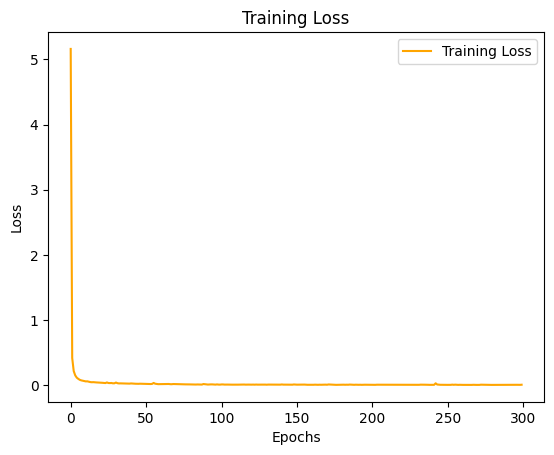

In [ ]:
# Plot the loss graph
plt.plot(model.history.history['mse'], label='Training Loss', color="orange")
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
#Predict
predictions = model.predict(X)

In [ ]:
predictions

array([[4.197217 ],
       [4.922525 ],
       [4.6761947],
       ...,
       [4.9260283],
       [4.9363737],
       [4.967062 ]], dtype=float32)

In [ ]:
loss, metrics = model.evaluate(X, Y)
print(loss, metrics)

113/113 [==============================] - 1s 3ms/step - loss: 0.0111 - mse: 0.0111
0.011061237193644047 0.011061237193644047


In [ ]:
top_15amenities = dict(list(sorted_dict_desc.items())[:15])
top_15amenities

{'Kitchen': 3445,
 'Smoke alarm': 3226,
 'Wifi': 3173,
 'Essentials': 2930,
 'Dishes and silverware': 2829,
 'Hot water': 2736,
 'Refrigerator': 2575,
 'Hangers': 2512,
 'Cooking basics': 2446,
 'Hair dryer': 2386,
 'Bed linens': 2384,
 'Iron': 2329,
 'Heating': 2030,
 'Microwave': 1927,
 'Fire extinguisher': 1903}

In [ ]:
from itertools import combinations
from sklearn.preprocessing import MultiLabelBinarizer

def generate_combinations(amenities):
    all_combinations = []
    for r in range(1, len(amenities) + 1):
        combinations_r = combinations(amenities, r)
        all_combinations.extend(combinations_r)
    return all_combinations

# Function to process a list of amenities into the format expected by the model
def process_amenities(combo_list):
    mlb = MultiLabelBinarizer(classes=list(top_15amenities.keys()))
    mlb.fit([list(top_15amenities.keys())])  # Fit the binarizer with all possible amenities
    amenity_vector = mlb.transform([combo_list])
    padded_amenity_vector = np.pad(amenity_vector, ((0, 0), (0, 964 - len(amenity_vector[0]))), 'constant')
    return padded_amenity_vector

# Generate and process all combinations
amenities_combinations = generate_combinations(top_15amenities)
processed_combinations = [process_amenities(list(combo)) for combo in amenities_combinations]

predictions_score = [model.predict(combo) for combo in processed_combinations]

# Find the index of the highest prediction
max_index = np.argmax(predictions_score)

# Retrieve the corresponding combination and its prediction
best_combination = amenities_combinations[max_index]
highest_prediction = predictions_score[max_index]

print(f"The best combination is: {best_combination} with a prediction of {highest_prediction}")

The best combination is: ('Kitchen', 'Smoke alarm', 'Dishes and silverware', 'Hair dryer', 'Heating', 'Microwave', 'Fire extinguisher') with a prediction of [[5.355524]]


In [ ]:
Have_top15_amenities = df_l[df_l['amenities'].apply(lambda x: all(amenity in x for amenity in best_combination))]
print(len(Have_top15_amenities['amenities']))
df_result = pd.concat([Have_top15_amenities['name'], Have_top15_amenities['amenities'], Have_top15_amenities['review_scores_rating']], axis=1)
df_result.head()

#required_amenities = ['Wifi', 'Dishes and silverware', 'Hot water', 'Cooking basics']

599


,name,amenities,review_scores_rating
7,Cosy apartment central at Sodermalm,"[""Iron"", ""Wine glasses"", ""Coffee"", ""Long term ...",4.64
10,"Spacious, bright, unique apartment","[""Iron"", ""Children\u2019s books and toys"", ""Dr...",4.97
11,Excellent location in the city center,"[""Paid parking off premises"", ""Iron"", ""Long te...",4.90
13,"Terrace house in Stockholm, Farsta","[""Iron"", ""Free parking on premises"", ""Children...",4.13
18,• ARTISTIC PENTHOUSE NEAR CITY CENTER,"[""Private sauna"", ""Iron"", ""Sun loungers"", ""Win...",4.68


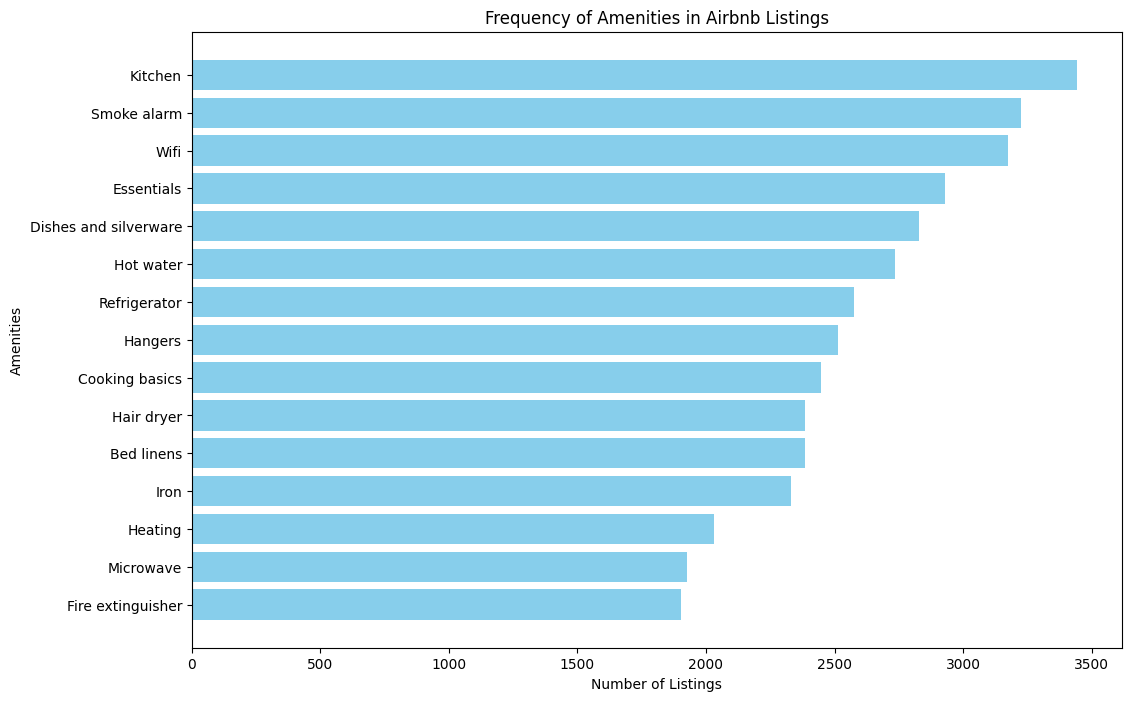

In [ ]:
import matplotlib.pyplot as plt

# Data
top_15_amenities = {
    'Kitchen': 3445,
    'Smoke alarm': 3226,
    'Wifi': 3173,
    'Essentials': 2930,
    'Dishes and silverware': 2829,
    'Hot water': 2736,
    'Refrigerator': 2575,
    'Hangers': 2512,
    'Cooking basics': 2446,
    'Hair dryer': 2386,
    'Bed linens': 2384,
    'Iron': 2329,
    'Heating': 2030,
    'Microwave': 1927,
    'Fire extinguisher': 1903
}

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(list(top_15_amenities.keys()), list(top_15_amenities.values()), color='skyblue')
plt.xlabel('Number of Listings')
plt.ylabel('Amenities')
plt.title('Frequency of Amenities in Airbnb Listings')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
plt.show()


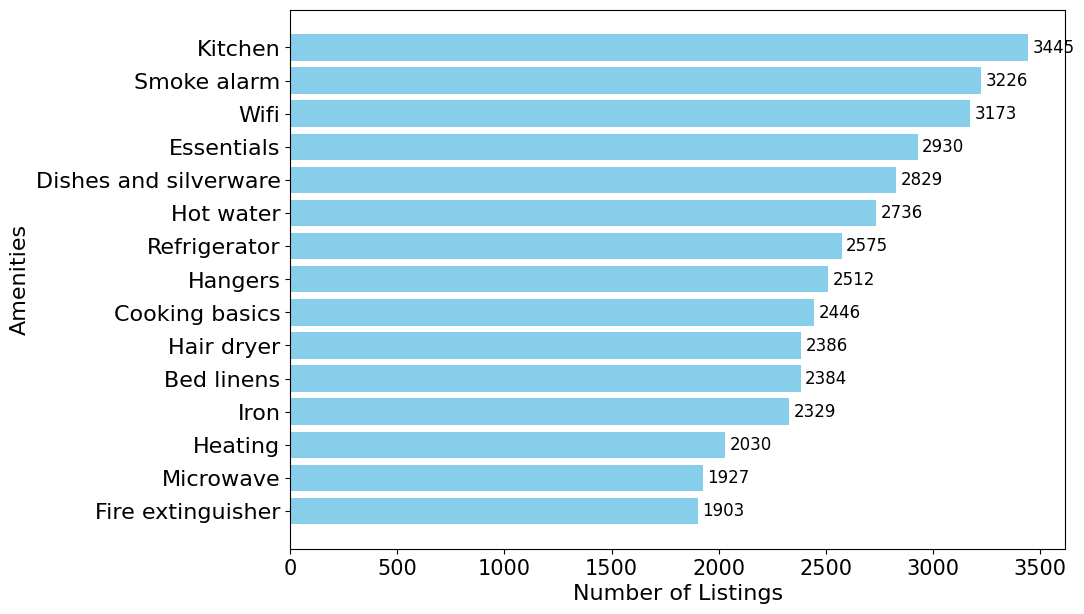

In [ ]:
# Sort the amenities based on frequency
sorted_amenities = sorted(top_15_amenities.items(), key=lambda x: x[1], reverse=True)
amenities = [item[0] for item in sorted_amenities]
frequency = [item[1] for item in sorted_amenities]

# Create bar chart
plt.figure(figsize=(10, 7))
plt.barh(amenities, frequency, color='skyblue')
plt.xlabel('Number of Listings', fontsize=16)
plt.ylabel('Amenities', fontsize=16)
# plt.title('Frequency of Amenities in Airbnb Listings', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top

# Add data labels
for i, v in enumerate(frequency):
    plt.text(v + 20, i, str(v), va='center', fontsize=12)

plt.show()
